## 모듈 import

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, HTML

warnings.filterwarnings('ignore') # 경고 무시

display(HTML("<style>.container { width:100% !important; }</style>"))

pd.options.display.float_format = '{:.4f}'.format # 데이터프레임 소수점 출력 포맷
pd.set_option('display.max_columns', 100)

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

<br/>
<br/>
<br/>
<br/>

## 데이터 로드

In [96]:
# dataset 폴더의 creditcard_user_info.csv 파일을 로드하세요.
df = pd.read_csv('./creditcard_user_info.csv')
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0000,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0000,-6.0000,1.0000
1,1,F,N,Y,1,247500.0000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0000,-5.0000,1.0000
2,2,M,Y,Y,0,450000.0000,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0000,-22.0000,2.0000
3,3,F,N,Y,0,202500.0000,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0000,-37.0000,0.0000
4,4,F,Y,Y,0,157500.0000,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0000,-26.0000,2.0000


#### 컬럼(columns) 설명
- index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
    - 'Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'
- edu_type: 교육 수준
    - 'Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'
- family_type: 결혼 여부
    - 'Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'
- house_type: 생활 방식
    - 'Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment'
- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- **credit** : 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (y 값으로 사용)
    - 낮을 수록 높은 신용의 신용카드 사용자를 의미함

<br/>
<br/>
<br/>
<br/>

## 데이터 정보 조회

In [97]:
# 행과 열의 개수를 조회하세요.
df.shape

(26457, 20)

In [98]:
# 기본 정보를 조회하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [99]:
# 통계값을 구하세요.
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.0000,26457.0000,26457.0000,26457.0000,26457.0000,26457.0000,26457.0000,26457.0000,26457.0000,26457.0000,26457.0000,26457.0000
mean,13228.0000,0.4287,187306.5245,-15958.0539,59068.7507,1.0000,0.2247,0.2943,0.0913,2.1968,-26.1233,1.5196
std,7637.6224,0.7473,101878.3680,4201.5890,137475.4275,0.0000,0.4174,0.4557,0.2880,0.9167,16.5595,0.7023
min,0.0000,0.0000,27000.0000,-25152.0000,-15713.0000,1.0000,0.0000,0.0000,0.0000,1.0000,-60.0000,0.0000
25%,6614.0000,0.0000,121500.0000,-19431.0000,-3153.0000,1.0000,0.0000,0.0000,0.0000,2.0000,-39.0000,1.0000
50%,13228.0000,0.0000,157500.0000,-15547.0000,-1539.0000,1.0000,0.0000,0.0000,0.0000,2.0000,-24.0000,2.0000
75%,19842.0000,1.0000,225000.0000,-12446.0000,-407.0000,1.0000,0.0000,1.0000,0.0000,3.0000,-12.0000,2.0000
max,26456.0000,19.0000,1575000.0000,-7705.0000,365243.0000,1.0000,1.0000,1.0000,1.0000,20.0000,0.0000,2.0000


<br/>
<br/>
<br/>
<br/>

## 의미없는 열 삭제
- FLAG_MOBIL
- index

In [100]:
# 'FLAG_MOBIL' 열의 값의 빈도수를 구하세요. (모든 값이 1)
df.loc[:,'FLAG_MOBIL'].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

In [101]:
# 'index', 'FLAG_MOBIL' 열을 삭제하세요.
df.drop(['index','FLAG_MOBIL'],axis=1,inplace=True)
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0000,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0000,-6.0000,1.0000
1,F,N,Y,1,247500.0000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0000,-5.0000,1.0000
2,M,Y,Y,0,450000.0000,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0000,-22.0000,2.0000
3,F,N,Y,0,202500.0000,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0000,-37.0000,0.0000
4,F,Y,Y,0,157500.0000,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0000,-26.0000,2.0000


<br/>
<br/>
<br/>
<br/>

## 결측치 처리
- occyp_type

In [102]:
# 각 열 별 결측치 개수를 구하세요.
df.isna().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [103]:
# 'occyp_type' 열의 결측치 비율을 구하세요.
df.loc[df['occyp_type'].isna()].shape[0]/df['occyp_type'].shape[0]

0.30884076047926823

In [104]:
# 'occyp_type' 열을 삭제하세요.
df.drop(['occyp_type'],axis=1,inplace=True)
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,202500.0000,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,2.0000,-6.0000,1.0000
1,F,N,Y,1,247500.0000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,3.0000,-5.0000,1.0000
2,M,Y,Y,0,450000.0000,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,2.0000,-22.0000,2.0000
3,F,N,Y,0,202500.0000,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,2.0000,-37.0000,0.0000
4,F,Y,Y,0,157500.0000,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,2.0000,-26.0000,2.0000


<br/>
<br/>

- (참고) income_type 별 최빈값으로 채우기

In [105]:
# df['occyp_type'].fillna(df.groupby('income_type')['occyp_type'].transform(lambda g : g.mode()[0]))

<br/>
<br/>
<br/>
<br/>

## Binary variables
- gender
- car
- reality

In [106]:
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,202500.0000,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,2.0000,-6.0000,1.0000
1,F,N,Y,1,247500.0000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,3.0000,-5.0000,1.0000
2,M,Y,Y,0,450000.0000,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,2.0000,-22.0000,2.0000
3,F,N,Y,0,202500.0000,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,2.0000,-37.0000,0.0000
4,F,Y,Y,0,157500.0000,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,2.0000,-26.0000,2.0000


In [107]:
# 'gender' 열의 값을 'F'는 0, 'M'은 1로 바꾸고 빈도수를 구하세요.
def transgender(x) :
    if x == 'F' : return 0
    if x == 'M' : return 1
    
df['gender'] = df['gender'].apply(transgender)
df['gender'].value_counts()


0    17697
1     8760
Name: gender, dtype: int64

In [108]:
# 'car' 열의 값을 'N'는 0, 'Y'은 1로 바꾸고 빈도수를 구하세요.
def transcar(x) :
    if x=='N' : return 0
    if x=='Y' : return 1
    
df['car'] = df['car'].apply(transcar)
df['car'].value_counts()


0    16410
1    10047
Name: car, dtype: int64

In [109]:
# 'reality' 열의 값을 'N'는 0, 'Y'은 1로 바꾸고 빈도수를 구하세요.
def transreality(x) :
    if x=='N' : return 0
    if x=='Y' : return 1
    
df['reality'] = df['reality'].apply(transcar)
df['reality'].value_counts()

1    17830
0     8627
Name: reality, dtype: int64

<br/>
<br/>
<br/>
<br/>

## 이상치 제거
- child_num

In [110]:
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,202500.0000,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,2.0000,-6.0000,1.0000
1,0,0,1,1,247500.0000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,3.0000,-5.0000,1.0000
2,1,1,1,0,450000.0000,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,2.0000,-22.0000,2.0000
3,0,0,1,0,202500.0000,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,2.0000,-37.0000,0.0000
4,0,1,1,0,157500.0000,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,2.0000,-26.0000,2.0000


In [111]:
# 'child_num' 열의 빈도수를 구하세요.
df['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [112]:
# 'child_num' 이 7 이상인 데이터를 삭제하고, 빈도수를 구하세요.
df = df.loc[df['child_num']<7]
# df.drop(df.loc[df['child_num']>=7],axis=1,inplace=True)
# df.drop(['occyp_type'],axis=1,inplace=True)

df['child_num'].value_counts()

0    18340
1     5386
2     2362
3      306
4       47
5       10
Name: child_num, dtype: int64

<br/>
<br/>

## Categorical variables
- income_type
- edu_type
- family_type
- house_type

In [113]:
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,202500.0000,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,2.0000,-6.0000,1.0000
1,0,0,1,1,247500.0000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,3.0000,-5.0000,1.0000
2,1,1,1,0,450000.0000,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,2.0000,-22.0000,2.0000
3,0,0,1,0,202500.0000,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,2.0000,-37.0000,0.0000
4,0,1,1,0,157500.0000,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,2.0000,-26.0000,2.0000


In [114]:
# encoding_cols의 각 열 별 빈도수를 구하세요.
encoding_cols = ['income_type', 'edu_type', 'family_type', 'house_type']

for col in encoding_cols :
    print(f'** {col} **')
    # code here
    print(df[col].value_counts())

    
    print()

** income_type **
Working                 13639
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

** edu_type **
Secondary / secondary special    17989
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

** family_type **
Married                 18194
Single / not married     3495
Civil marriage           2123
Separated                1536
Widow                    1103
Name: family_type, dtype: int64

** house_type **
House / apartment      23647
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64



In [115]:
# encoding_cols를 원 핫 인코딩하세요.
df = pd.get_dummies(df,columns=encoding_cols)
df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,0,0,0,202500.0000,-13899,-4709,0,0,0,2.0000,-6.0000,1.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,1,1,247500.0000,-11380,-1540,0,0,1,3.0000,-5.0000,1.0000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2,1,1,1,0,450000.0000,-19087,-4434,0,1,0,2.0000,-22.0000,2.0000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,202500.0000,-15088,-2092,0,1,0,2.0000,-37.0000,0.0000,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,1,1,0,157500.0000,-15037,-2105,0,0,0,2.0000,-26.0000,2.0000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [116]:
# # 또는 라벨 인코딩
# from sklearn.preprocessing import LabelEncoder

# for col in encoding_cols :
#     df[col] = encoder.fit_transform(df[col])

# df.head()

<br/>
<br/>

## Continuous variables
- DAYS_BIRTH
- DAYS_EMPLOYED
- begin_month

In [117]:
df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,0,0,0,202500.0000,-13899,-4709,0,0,0,2.0000,-6.0000,1.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,1,1,247500.0000,-11380,-1540,0,0,1,3.0000,-5.0000,1.0000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2,1,1,1,0,450000.0000,-19087,-4434,0,1,0,2.0000,-22.0000,2.0000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,202500.0000,-15088,-2092,0,1,0,2.0000,-37.0000,0.0000,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,1,1,0,157500.0000,-15037,-2105,0,0,0,2.0000,-26.0000,2.0000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [118]:
# 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month' 열의 최대값과 최소값을 구하세요.
df.describe().loc[['max','min'],:].loc[:,['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
max,-7705.0000,365243.0000,0.0000
min,-25152.0000,-15713.0000,-60.0000


<br/>
<br/>

- 이상치 처리 및 컬럼 추가

In [119]:
# 'DAYS_EMPLOYED' 열의 값이 양수인 행을 선택하세요.
df.loc[df['DAYS_EMPLOYED']>0]

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
14,0,0,1,0,157500.0000,-22922,365243,0,1,0,1.0000,-41.0000,2.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
18,0,0,1,0,216000.0000,-23113,365243,0,0,0,2.0000,-37.0000,2.0000,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
21,0,0,0,0,157500.0000,-21253,365243,0,1,0,2.0000,-7.0000,2.0000,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
24,0,0,0,0,202500.0000,-22361,365243,0,1,0,1.0000,-5.0000,2.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
46,0,0,0,0,135000.0000,-21100,365243,0,1,0,1.0000,-24.0000,2.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,0,0,1,0,225000.0000,-21151,365243,0,0,1,1.0000,-60.0000,1.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
26432,0,1,1,0,72000.0000,-22314,365243,0,1,0,2.0000,-17.0000,1.0000,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
26439,0,0,1,0,67500.0000,-19238,365243,0,0,0,2.0000,-57.0000,2.0000,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
26441,0,0,1,0,90000.0000,-24129,365243,0,0,0,1.0000,-43.0000,2.0000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [120]:
# 위 데이터프레임의 인덱스를 idx에 저장하세요.
idx = df[df['DAYS_EMPLOYED']>0].index
idx

Int64Index([   14,    18,    21,    24,    46,    48,    52,    58,    59,
               60,
            ...
            26389, 26401, 26402, 26406, 26427, 26431, 26432, 26439, 26441,
            26443],
           dtype='int64', length=4438)

In [121]:
type(idx)

pandas.core.indexes.numeric.Int64Index

In [122]:
# idx 행은 1, 나머지 행은 0의 값을 'working' 열에 추가하세요.

# df['working'] = np.where(df.index.isin(idx),1,0)
# idx = list(idx)
df['working'] = 0
df.loc[idx,'working'] = 1

# 'working' 열의 빈도수를 구하세요.
df['working'].value_counts()

0    22013
1     4438
Name: working, dtype: int64

In [123]:
# idx 행의 'DAYS_EMPLOYED' 열의 값을 0으로 수정하세요.
df['DAYS_EMPLOYED'] = np.where(df.index.isin(idx),0,df['DAYS_EMPLOYED'])
# 'DAYS_EMPLOYED' 열의 최대, 최소값을 구하세요.
df.describe().loc[['max','min'],:].loc[:,['DAYS_EMPLOYED']]

,DAYS_EMPLOYED
max,0.0000
min,-15713.0000


<br/>
<br/>

- 양수 변환

In [124]:
# 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month' 열의 최대값과 최소값을 구하세요.
df.describe().loc[['max','min'],:].loc[:,['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
max,-7705.0000,0.0000,0.0000
min,-25152.0000,-15713.0000,-60.0000


In [125]:
# 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month' 열의 값을 양수로 변환하세요.\
def transplus(x):
    return abs(x)
df.loc[:,['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']] = df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].apply(transplus)

# 세 열의 최대, 최소값을 구하세요.
df.describe().loc[['max','min'],:].loc[:,['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']]

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
max,25152.0000,15713.0000,60.0000
min,7705.0000,0.0000,0.0000


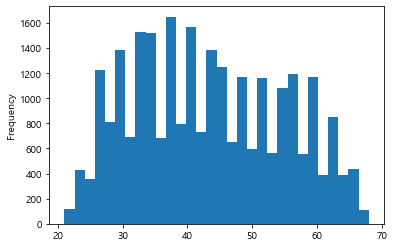

In [126]:
# 'DAYS_BIRTH' 의 값에 365로 나눈 값(나이)의 분포 그래프를 그리세요. (hist plot, bins = 30)
# df['DAYS_BIRTH'] = df['DAYS_BIRTH']/365
# sns.histplot(data=df['DAYS_BIRTH'],stat='frequency',bins=30)
plt.hist(df['DAYS_BIRTH']//365,bins=30)
plt.gca().set(ylabel='Frequency')
plt.show()

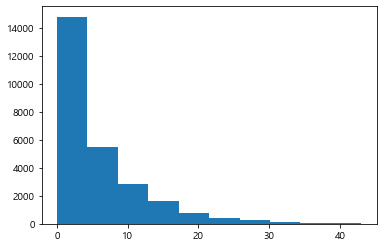

In [127]:
# 'DAYS_EMPLOYED' 의 값에 365로 나눈 값(연차)의 분포 그래프를 그리세요. (hist plot, bins = 10)
# df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED']/365
plt.hist(df['DAYS_EMPLOYED']//365,bins=10)
plt.show()

(array([2854., 3632., 3368., 2954., 2878., 2497., 2516., 2126., 1905.,
        1721.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

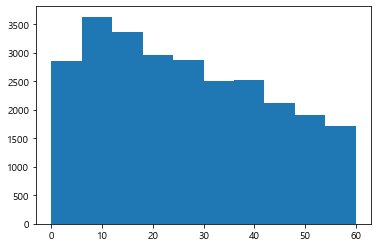

In [128]:
# 'begin_month' 의 값의 분포 그래프를 그리세요. (hist plot, bins = 10)
plt.hist(df['begin_month'],bins=10)

<br/>
<br/>
<br/>
<br/>

## (참고) 중복 데이터 제거
- 그대로 실행

In [129]:
df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,working
0,0,0,0,0,202500.0000,13899,4709,0,0,0,2.0000,6.0000,1.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,1,1,247500.0000,11380,1540,0,0,1,3.0000,5.0000,1.0000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
2,1,1,1,0,450000.0000,19087,4434,0,1,0,2.0000,22.0000,2.0000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,202500.0000,15088,2092,0,1,0,2.0000,37.0000,0.0000,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,1,0,157500.0000,15037,2105,0,0,0,2.0000,26.0000,2.0000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [130]:
df.shape

(26451, 35)

In [131]:
# 중복 데이터 제거 (중복되는 첫 번째 행은 남김)
df = df.drop_duplicates(keep = 'first')
df.shape

(24817, 35)

In [132]:
# 'begin_month' 열까지 중복되는 데이터의 개수
(df.loc[:, :'begin_month'].duplicated(keep = False)).sum()

1433

In [133]:
# 위 데이터의 'credit' 열의 빈도수
df[df.loc[:, :'begin_month'].duplicated(keep = False)].sort_values(df.columns.to_list())['credit'].value_counts()

2.0000    619
1.0000    471
0.0000    343
Name: credit, dtype: int64

<br/>
<br/>
<br/>
<br/>

## 컬럼 추가
- ability
- income_mean

In [134]:
# income_total / (DAYS_BIRTH + DAYS_EMPLOYED) 의 결과를 'ability' 열에 추가하세요.
df['ability'] = df['income_total'] / (df['DAYS_BIRTH']+df['DAYS_EMPLOYED'])
df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,working,ability
0,0,0,0,0,202500.0000,13899,4709,0,0,0,2.0000,6.0000,1.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,10.8824
1,0,0,1,1,247500.0000,11380,1540,0,0,1,3.0000,5.0000,1.0000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,19.1563
2,1,1,1,0,450000.0000,19087,4434,0,1,0,2.0000,22.0000,2.0000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,19.1318
3,0,0,1,0,202500.0000,15088,2092,0,1,0,2.0000,37.0000,0.0000,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,11.7870
4,0,1,1,0,157500.0000,15037,2105,0,0,0,2.0000,26.0000,2.0000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,9.1880


In [135]:
# income_total / family_size 의 결과를 'income_mean' 열에 추가하세요.
df['income_mean'] = df['income_total'] / df['family_size']
df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,working,ability,income_mean
0,0,0,0,0,202500.0000,13899,4709,0,0,0,2.0000,6.0000,1.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,10.8824,101250.0000
1,0,0,1,1,247500.0000,11380,1540,0,0,1,3.0000,5.0000,1.0000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,19.1563,82500.0000
2,1,1,1,0,450000.0000,19087,4434,0,1,0,2.0000,22.0000,2.0000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,19.1318,225000.0000
3,0,0,1,0,202500.0000,15088,2092,0,1,0,2.0000,37.0000,0.0000,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,11.7870,101250.0000
4,0,1,1,0,157500.0000,15037,2105,0,0,0,2.0000,26.0000,2.0000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,9.1880,78750.0000


<br/>
<br/>
<br/>
<br/>

## 스케일링

- income_total
- income_mean

In [136]:
# 'income_total', 'income_mean' 열의 최대, 최소값을 구하세요.
df.describe().loc[['max','min'],:].loc[:,['income_total', 'income_mean']]

,income_total,income_mean
max,1575000.0000,900000.0000
min,27000.0000,7560.0000


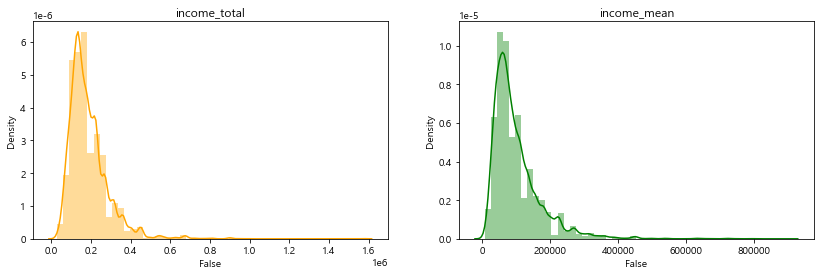

In [137]:
# 두 열의 값의 분포를 seaborn.distplot 을 사용하여 그래프를 그리세요. (bins = 50)
plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
# code here
sns.distplot(df['income_total'],bins=50,color='orange',axlabel='False')
plt.title('income_total')

plt.subplot(1,2,2)
# code here

plt.title('income_mean')
sns.distplot(df['income_mean'],bins=50,color='g',axlabel='False')

plt.show()

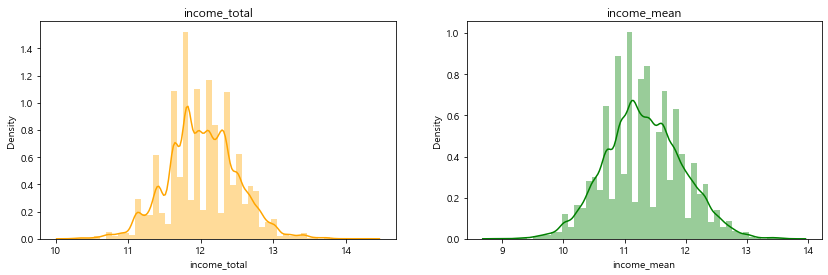

In [138]:
# 두 열의 값을 np.log1p 를 사용하여 로그변환 하세요.
df['income_total'] = np.log1p(df['income_total'])
df['income_mean'] = np.log1p(df['income_mean'])


# 위의 그래프를 그리세요.
plt.figure(figsize = (14,4))

plt.subplot(1,2,1)
# code here
sns.distplot(df['income_total'],bins=50,color='orange')


plt.title('income_total')

plt.subplot(1,2,2)
# code here
sns.distplot(df['income_mean'],bins=50,color='g')

plt.title('income_mean')

plt.show()

<br/>
<br/>
<br/>
<br/>

## 학습, 검증 데이터 분리

In [139]:
df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,working,ability,income_mean
0,0,0,0,0,12.2185,13899,4709,0,0,0,2.0000,6.0000,1.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,10.8824,11.5254
1,0,0,1,1,12.4192,11380,1540,0,0,1,3.0000,5.0000,1.0000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,19.1563,11.3206
2,1,1,1,0,13.0170,19087,4434,0,1,0,2.0000,22.0000,2.0000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,19.1318,12.3239
3,0,0,1,0,12.2185,15088,2092,0,1,0,2.0000,37.0000,0.0000,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,11.7870,11.5254
4,0,1,1,0,11.9672,15037,2105,0,0,0,2.0000,26.0000,2.0000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,9.1880,11.2740


In [140]:
# 'credit' 열을 제외한 나머지 열은 X, 'credit' 열은 y 에 저장하세요.
X = df.loc[:,df.columns!='credit']
y = df.loc[:,'credit']

In [141]:
# 학습 데이터와 검증 데이터를 3 : 1 비율로 분리하세요. (y 값 빈도수 비율을 유지)
# random_state = 42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify=y,
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18612, 36), (6205, 36), (18612,), (6205,))

<br/>
<br/>
<br/>
<br/>

## 모델링
- Decision Tree
- Random Forest
- xgboost
- lightgbm

In [142]:
# Decision Tree 모델을 학습한 뒤 Train, Test 데이터의 score를 구하세요.
# 하이퍼 파라미터를 자유롭게 조절하세요.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test,  y_test)


(0.9778100150440576, 0.5771152296535053)

In [143]:
# Random Forest 모델을 학습한 뒤 Train, Test 데이터의 score를 구하세요.
# 하이퍼 파라미터를 자유롭게 조절하세요.
from sklearn.ensemble import RandomForestClassifier


model.score(X_train,y_train), model.score(X_test,y_test)


(0.9778100150440576, 0.5771152296535053)

In [144]:
# xgboost 모델을 학습한 뒤 Train, Test 데이터의 score를 구하세요.
# 하이퍼 파라미터를 자유롭게 조절하세요.
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
model.xgboost.XGBRegressor(objective='linear')
model.fit(X_train,y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)

r2_score(y_train,p_train), r2_score(y_test,p_test)


AttributeError: 'DecisionTreeClassifier' object has no attribute 'xgboost'

In [812]:
# lightgbm 모델을 학습한 뒤 Train, Test 데이터의 score를 구하세요.
# 하이퍼 파라미터를 자유롭게 조절하세요.
from lightgbm import LGBMClassifier

lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_test,y_test, reference=lgb_train)

params = {
    'objective' : regression, 
}

model = lgb.train(params,lgb_train, valid_sets=lgb_eval,
                 early_stopping_rounds=5)
p_train = model.predict(X_train, num_iteration=model.best_iteration)
p_test = model.predict(X_test, num_iteration=model.best_iteration)

r2_score(y_train,p_train), r2_score(y_test,p_test)


(0.7237266279819471, 0.6917002417405318)

In [813]:
# lightgbm이 X_test 를 예측한 결과를 pred에 저장하세요.
pred = p_test
pred

array([2., 2., 2., ..., 2., 2., 2.])

In [714]:
# 정답과 비교하여 confusion matrix를 구하세요. (그대로 실행)
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, pred),
             index = [['Real']*3, [0,1,2]],
             columns = [['Predict']*3, [0,1,2]])

Predict           
             0    1     2
Real 0      35   99   631
     1      11  361  1111
     2      10   51  3896

In [818]:
# X_test 데이터 프레임을 복사하여 result에 저장한 뒤 정답을 'credit' 열에, 예측 값을 'predict' 열에 추가하세요.
result = X_test.copy()
result['credit'] = X_test['credit']
result['predict'] = pred

result

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,working,ability,income_mean,credit,predict
2846,1,1,1,1,11.8130,16258,5064,0,0,0,3.0000,14.0000,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,6.3315,10.7144,2.0000,2.0000
20997,1,0,1,0,11.4076,16459,704,1,0,0,2.0000,4.0000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,5.2438,10.7144,2.0000,2.0000
12741,0,0,1,0,11.4076,19461,5124,0,0,0,2.0000,28.0000,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,3.6608,10.7144,0.0000,2.0000
15385,0,1,1,0,12.1007,16518,410,0,0,0,2.0000,58.0000,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,10.6333,11.4076,1.0000,2.0000
26093,0,0,1,0,12.2185,12347,2057,0,0,0,2.0000,44.0000,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,14.0586,11.5254,2.0000,2.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,1,0,0,0,12.1007,16743,808,0,1,0,1.0000,20.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,10.2558,12.1007,2.0000,2.0000
22619,0,0,0,0,11.6307,23272,0,0,1,0,2.0000,40.0000,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,4.8341,10.9376,2.0000,2.0000
13001,1,1,0,0,11.6307,16804,0,0,0,0,2.0000,45.0000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,6.6948,10.9376,1.0000,2.0000
9617,0,0,0,0,12.4192,18696,1800,0,1,0,1.0000,41.0000,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,12.0755,12.4192,2.0000,2.0000
